In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [3]:
import os

img_folder = 'imgs'
if not os.path.exists(img_folder):
    os.makedirs(img_folder)

## Question 1: Perceptron

### preamble:
<font size="3">First load the separable dataset of 200 instances of 2D-features. </font>

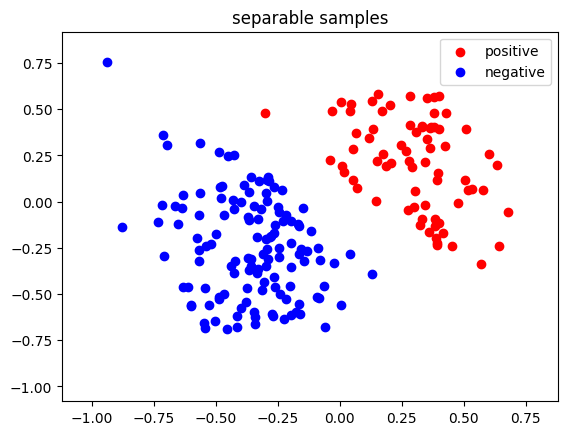

In [4]:
from utils import plot_samples

# load the dataset
data_q1_separable = np.load('datasets/q1_separable.npz')
separable_x = data_q1_separable['x']
separable_y = data_q1_separable['y']

# visualize the datapoints
fig, ax = plt.subplots(1)
plot_samples(ax, separable_x, separable_y, 'separable samples', legend=True)

### Perceptron Algorithm without Maximizing the Margin
<font size="3"> **Q1(a)** The basic perceptron algorithm is already implemented. Complete all TODO part in q1.py marked as 'Q1(a)' to implement the computation of geometric margin. </font>

In [5]:
from q1 import perceptron_algo

geom_margins = []
result = perceptron_algo(separable_x, separable_y, N_iters=10, geom_margins=geom_margins)

max margin: 0.0


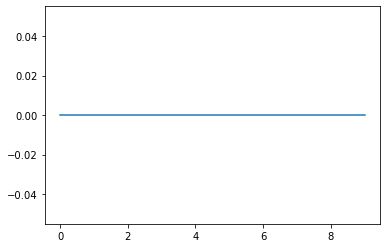

In [6]:
plt.plot(geom_margins)
print(f'max margin: {geom_margins[-1]}')
plt.savefig(os.path.join(img_folder, 'Q1_a.png'))

<font size="3"> **[Question]**: after how many iterations does the decision boundary stop updating?
<br> **[Answer]**: 
</font>

#### Q1(b) Margin Perceptron Algorithm

<font size="3"> In this section, please complete the margin perceptron algorithm (TODO marked as 'Q1(b)' in q1.py). After you have completed the task, run the block below and answer the question. </font>

NameError: name 'perceptron_algo' is not defined

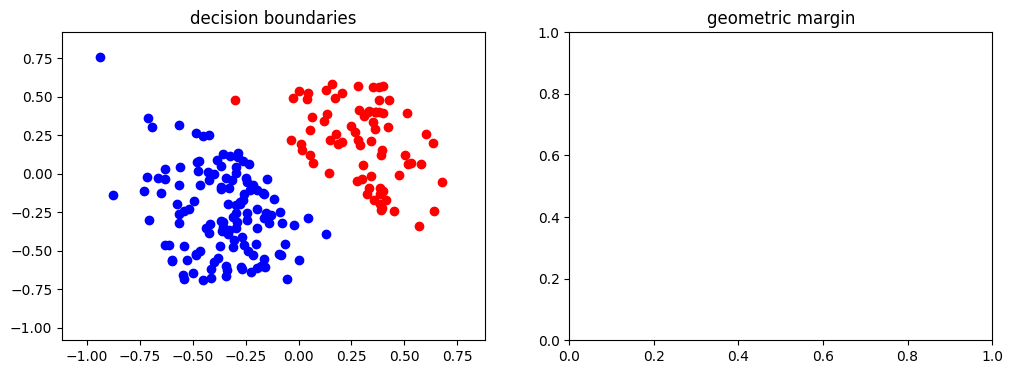

In [8]:
from utils import plot_line

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
plot_samples(axs[0], separable_x, separable_y, 'decision boundaries')
axs[1].set_title('geometric margin')
margins = [0.05, 0.1, 0.2, 0.5]
colors = ['red', 'orange', 'green', 'blue']
for margin, color in zip(margins, colors):
    geom_margins = []
    result = perceptron_algo(separable_x, separable_y, N_iters=10, geom_margins=geom_margins, margin=margin)
    plot_line(axs[0], label=f'margin: {margin}', color=color, weights=result)
    axs[1].plot(geom_margins, label=f'margin: {margin}', c=color)
axs[0].legend()
axs[1].legend()
plt.savefig(os.path.join(img_folder, 'Q1_b.png'))

<font size="3"> **[Question]**: Briefly discuss and explain the impact of $\gamma$ on the resulting margin.
<br> **[Answer]**: 
</font>

### Q1(c)  Variable-Increment Perceptron

<font size="3"> In this section, please complete the variant-increment perceptron algorithm (TODO marked as 'Q1(c)' in q1.py). After you have completed the task, run the block below and answer the question. </font>

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
plot_samples(axs[0], separable_x, separable_y, 'decision boundaries')
axs[1].set_title('geometric margin')
margins = [0.05, 0.1, 0.2, 0.5]
colors = ['red', 'orange', 'green', 'blue']
for margin, color in zip(margins, colors):
    geom_margins = []
    result = perceptron_algo(
        separable_x, separable_y, N_iters=10, geom_margins=geom_margins, 
        margin=margin, variable_increment=True)
    plot_line(axs[0], label=f'margin: {margin}', color=color, weights=result)
    axs[1].plot(geom_margins, label=f'margin: {margin}', c=color)
axs[0].legend()
axs[1].legend()
plt.savefig(os.path.join(img_folder, 'Q1_c.png'))

<font size="3"> **[Question]**: What step size $\eta_i$ you use for each sample $x_i$. Explain how these step sizes satisfy the properties that guarantee a solution with the margin $\frac{\gamma}{2}$ on $\gamma$-linearly separable dataset.
<br> **[Answer]**: 
</font>

<font size="3"> **[Question]**: Compare the result with the result obtained in (b). Describe and explain the difference.
<br> **[Answer]**: 
</font>

### Data that are not linearly separable

<font size="3"> We will use a not linearly separable dataset with offset for Q1(d) </font>

In [ ]:
# load the sparable samples
data_q1_not_separable = np.load('datasets/q1_non_separable.npz')
not_separable_x = data_q1_not_separable['x']
not_separable_y = data_q1_not_separable['y']

# visualize the datapoints
fig, ax = plt.subplots(1)
plot_samples(ax, not_separable_x, not_separable_y, 'not linearly separable samples', legend=True)

### Q1(d) Batch Variable-Increment Perceptron
<font size="3"> In this section, please complete the batch perceptron algorithm (TODO marked as 'Q1(d)' in q1.py). After you have completed the task, run the block below and answer the question. Boundary lines of darker color are generated in later iterations. </font>

In [ ]:
import matplotlib as mpl
import matplotlib.cm as cm
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
plot_samples(axs[0], not_separable_x, not_separable_y, 'online learning')
plot_samples(axs[1], not_separable_x, not_separable_y, 'batch learning')
theta_online = None
theta_batch = None

N_iters = 10
interval = 3
online_cmap = plt.get_cmap('Greens')
batch_cmap = plt.get_cmap('Blues')
for iter in range(N_iters):
    theta_online = perceptron_algo(
        not_separable_x, not_separable_y, N_iters=interval, geom_margins=[], 
        initial_weights=theta_online)
    theta_batch = perceptron_algo(
        not_separable_x, not_separable_y, N_iters=interval, geom_margins=[],
        initial_weights=theta_batch, batch=True)
    plot_line(axs[0], color=online_cmap((iter+1)/N_iters), weights=theta_online)
    plot_line(axs[1], color=batch_cmap((iter+1)/N_iters), weights=theta_batch)
fig.colorbar(cm.ScalarMappable(
    norm=mpl.colors.Normalize(vmin=0, vmax=N_iters*interval-1), cmap=online_cmap), ax=axs[0])
fig.colorbar(cm.ScalarMappable(
    norm=mpl.colors.Normalize(vmin=0, vmax=N_iters*interval-1), cmap=batch_cmap), ax=axs[1])
plt.savefig(os.path.join(img_folder, 'Q1_d.png'))

<font size="3"> **[Question]**: Compare the results obtained using batch learning and online learning. Briefly explain the reason.
<br> **[Answer]**: 
</font>

<font size="3"> **[Question]**: If batch learning is not available, is there any other tricks that might mitigate the oscillation?
<br> **[Answer]**: 
</font>

## Question 2: SVM

### preamble:
first load the separable dataset of 200 instances of 2D-features (with offset). </font>

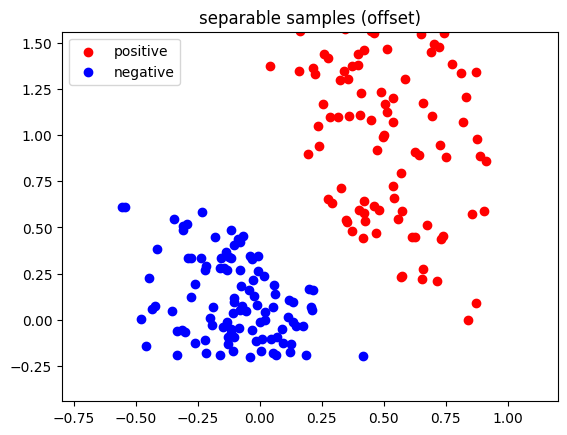

In [9]:
# load the sparable samples
data_q2_separable = np.load('datasets/q2_separable.npz')
separable_x2 = data_q2_separable['x']
separable_y2 = data_q2_separable['y']

# visualize the datapoints
fig, ax = plt.subplots(1)
plot_samples(ax, separable_x2, separable_y2, 'separable samples (offset)', legend=True)

### Q2(a) Primal SVM
<font size="3"> In this section, please complete the hard SVM primal problem solver 'solve_SVM_primal' (TODO marked as 'Q2(a)' in q2.py). For hard SVM, the default value of the argument 'regularization' is None. After you have completed the task, run the block below to check the decision boundary obtained. </font>

     pcost       dcost       gap    pres   dres
 0:  1.7641e+00  9.1834e+01  6e+02  2e+00  2e+02
 1:  1.4845e+01 -7.4063e+01  1e+02  4e-01  4e+01
 2:  1.8220e+01 -5.0346e+01  9e+01  2e-01  2e+01
 3:  2.1952e+01 -2.5659e+01  5e+01  1e-01  1e+01
 4:  2.2082e+01  6.1931e+00  2e+01  3e-02  4e+00
 5:  2.3103e+01  1.3139e+01  1e+01  1e-02  1e+00
 6:  2.2954e+01  2.2648e+01  3e-01  2e-04  2e-02
 7:  2.2906e+01  2.2903e+01  3e-03  2e-06  2e-04
 8:  2.2906e+01  2.2906e+01  3e-05  2e-08  2e-06
 9:  2.2906e+01  2.2906e+01  3e-07  2e-10  2e-08
Optimal solution found.
weights: [[4.84317063]
 [3.90375798]]; bias: -2.6676048770786367


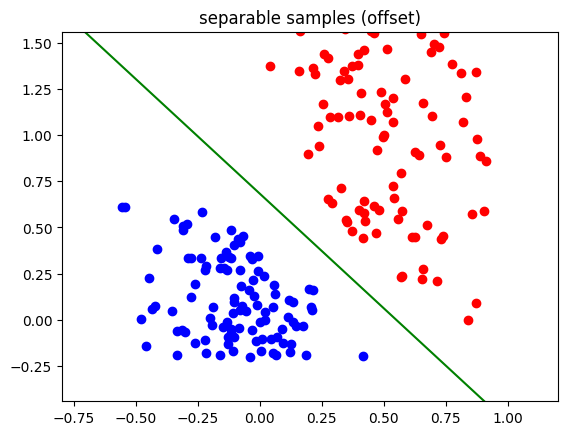

In [10]:
from q2 import solve_SVM_primal

w, b = solve_SVM_primal(separable_x2, separable_y2)
fig, ax = plt.subplots(1)
plot_samples(ax, separable_x2, separable_y2, 'separable samples (offset)')
plot_line(ax, 'green', w, bias=b)
plt.savefig(os.path.join(img_folder, 'Q2_a.png'))

### Q2(b) Support Vectors
<font size="3"> To visualize the support vector, finish implementing the method 'get\_support\_vector'. Note that to deal with numerical errors, two numbers are considered equal when their difference is within $\epsilon$. Run the block of plotting to verify your implementation.</font>

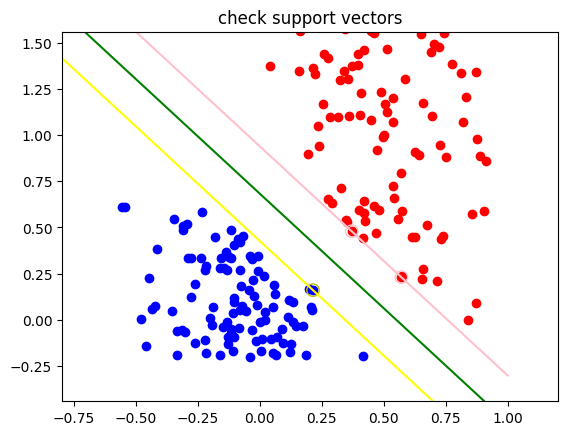

In [17]:
from q2 import get_support_vectors

positive_vectors, positive_boundary, negative_vectors, negative_boundary = get_support_vectors(
    separable_x2, separable_y2, w, b)
fig, ax = plt.subplots(1)
plot_samples(ax, separable_x2, separable_y2, 'check support vectors')
plot_line(ax, 'green', w, bias=b)
plot_line(ax, 'pink', positive_boundary[0], bias=positive_boundary[1])
plot_line(ax, 'yellow', negative_boundary[0], bias=negative_boundary[1])
ax.scatter(positive_vectors[:, 0], positive_vectors[:, 1], s=80, facecolors='none', edgecolors='pink')
ax.scatter(negative_vectors[:, 0], negative_vectors[:, 1], s=80, facecolors='none', edgecolors='y')
plt.savefig(os.path.join(img_folder, 'Q2_b.png'))

In [ ]:
# load the nonseparable samples
data_q2_nonseparable = np.load('datasets/q2_non_separable.npz')
nonseparable_x2 = data_q2_nonseparable['x']
nonseparable_y2 = data_q2_nonseparable['y']

# visualize the datapoints
fig, ax = plt.subplots(1)
plot_samples(ax, nonseparable_x2, nonseparable_y2, 'non-separable samples (offset)', legend=True)

<font size="3"> In this section you need to implement the soft SVM with not-null regularization in the method 'solve\_SVM\_primal' in 'q2.py'. After you've completed the code, run the experiment on different regularization.</font>

In [ ]:
# now test the results with different regularizations
regularozations = [0.1, 0.5, 5]
fig, axs = plt.subplots(1, len(regularozations), figsize=(len(regularozations)*4, 3))
for ax, C in zip(axs, regularozations):
    # compute the result
    w, b = solve_SVM_primal(nonseparable_x2, nonseparable_y2, regularization=C)
    plot_samples(ax, nonseparable_x2, nonseparable_y2, f'regularization={C}')
    plot_line(ax, 'green', w, bias=b)
    # mark support vectors
    positive_vectors, positive_boundary, negative_vectors, negative_boundary = get_support_vectors(
        nonseparable_x2, nonseparable_y2, w, b)
    plot_line(ax, 'pink', positive_boundary[0], bias=positive_boundary[1])
    plot_line(ax, 'yellow', negative_boundary[0], bias=negative_boundary[1])
    ax.scatter(positive_vectors[:, 0], positive_vectors[:, 1], s=80, facecolors='none', edgecolors='pink')
    ax.scatter(negative_vectors[:, 0], negative_vectors[:, 1], s=80, facecolors='none', edgecolors='y')
    plt.savefig(os.path.join(img_folder, 'Q2_c.png'))

### Dual SVM and Cross Validation
<font size="3"> In some cases, rather than the feature vectors we only have pairwise distances/similarities of the samples. We will explore kernel transformation and dual SVM in the following section.
In this section we use the wine data from [link](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html) and only keep two classes. </font>

#### Kernel Functions
<font size='3'> kernel transformation: the pairwise relations between samples are more obvious after certain kernel transformation is applied. For this question, you need to implement the RBF kernel function ($\mathcal{K}(x, y) = exp(-\gamma||x-y||^2) $). Finish implementing the method 'get\_affinity\_matrix' in `q2.py`. </font>

In [ ]:
from q2 import get_affinity_matrix
from utils import plot_affinities

wine_data = np.load('datasets/wine.npz')
wine_x = wine_data['x']
wine_y = wine_data['y']
transformed_basic = get_affinity_matrix(wine_x, method='product')
transformed_rbf = get_affinity_matrix(wine_x, method='rbf', gamma=1e-5)
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plot_affinities(axs[0], transformed_basic, wine_y, title='dot product')
plot_affinities(axs[1], transformed_rbf, wine_y, title='rbf kernel')
plt.savefig(os.path.join(img_folder, 'Q2_d.png'))

<font size="3">Now implement the dual method and test it on the rbf embeddings. You should expect the best average test accuracy above 90% </font>

In [ ]:
from q2 import solve_SVM_dual

regularizations = [1, 5, 10]
for regularization in regularizations:
    print(f"==========start the experiment on C={regularization}==========")
    solve_SVM_dual(transformed_rbf, wine_y, regularization=regularization, folds=5)